## Machine Learning 1 - Linear Regression Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_price_df = pd.read_csv('CarPrice_Assignment.csv')

## 1. Reading and Understanding Data

In [3]:
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
car_price_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#Look at number and type of unique values for categorical variables. This may help understand data better and for  encoding

In [7]:
unique_values = [[col , car_price_df[col].unique()] if (car_price_df[col].dtype not in (np.int64, np.float64)) 
                 else [col, car_price_df[col].dtype] for col in car_price_df.columns]

In [8]:
unique_values

[['car_ID', dtype('int64')],
 ['symboling', dtype('int64')],
 ['CarName', array(['alfa-romero giulia', 'alfa-romero stelvio',
         'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
         'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
         'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
         'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
         'dodge rampage', 'dodge challenger se', 'dodge d200',
         'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
         'dodge coronet custom', 'dodge dart custom',
         'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
         'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
         'honda accord', 'honda civic 1300', 'honda prelude',
         'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
         'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
         'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'm

As per the data preparation description in the problem statement as well as our intuition, for the column car names not only the manufacturer name but also the model detials are included. We can drop the model and retain only the manufacturer

In [9]:
car_price_df['company'] = car_price_df['CarName'].str.split(' ').str[0]
car_price_df.drop('CarName', axis=1, inplace = True)

In [10]:
#Dropping car id as it is a unique variable and cannot offer any insights
car_price_df.drop('car_ID', axis=1, inplace = True)

## 2. Data Visualisation

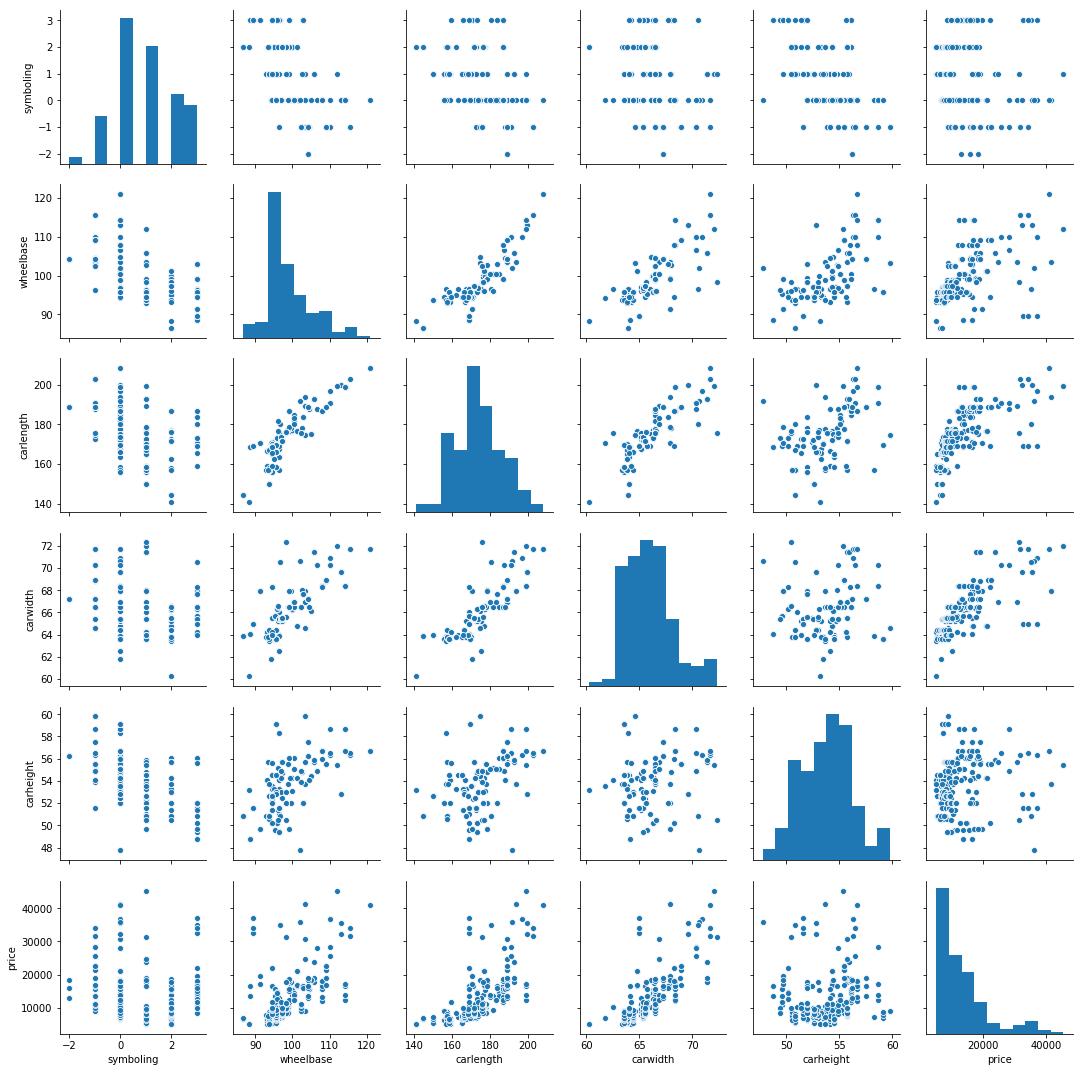

In [11]:
list_cols = np.append(car_price_df.columns[0:11],['price'])
sns.pairplot(car_price_df[list_cols])
plt.show()

Price is correlated in an approx linear relationship with 
 - car length
 - car width
 - wheel base

However there is also a linear relationship (therefore multicollinearity) between these 3 variables as well. 
 - car width, wheel base and car length

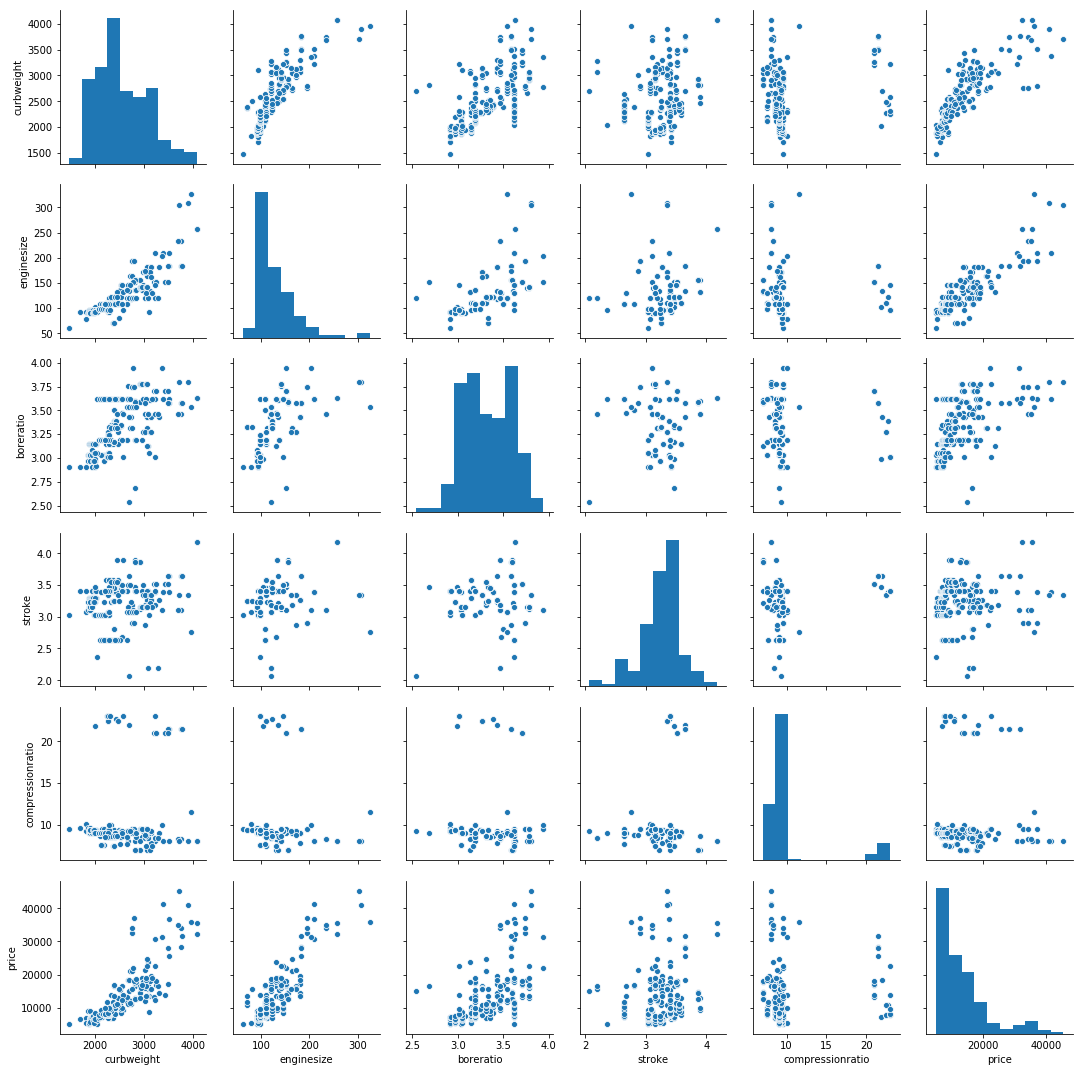

In [12]:
list_cols = np.append(car_price_df.columns[11:19],['price'])
sns.pairplot(car_price_df[list_cols])
plt.show()

Following variables look promising as well in terms of linear relationship with price

- curb weight
- engine size 
- bore ratio

The same issue of linear relationship between these variables as well - curb weight, engine size and bore ratio 


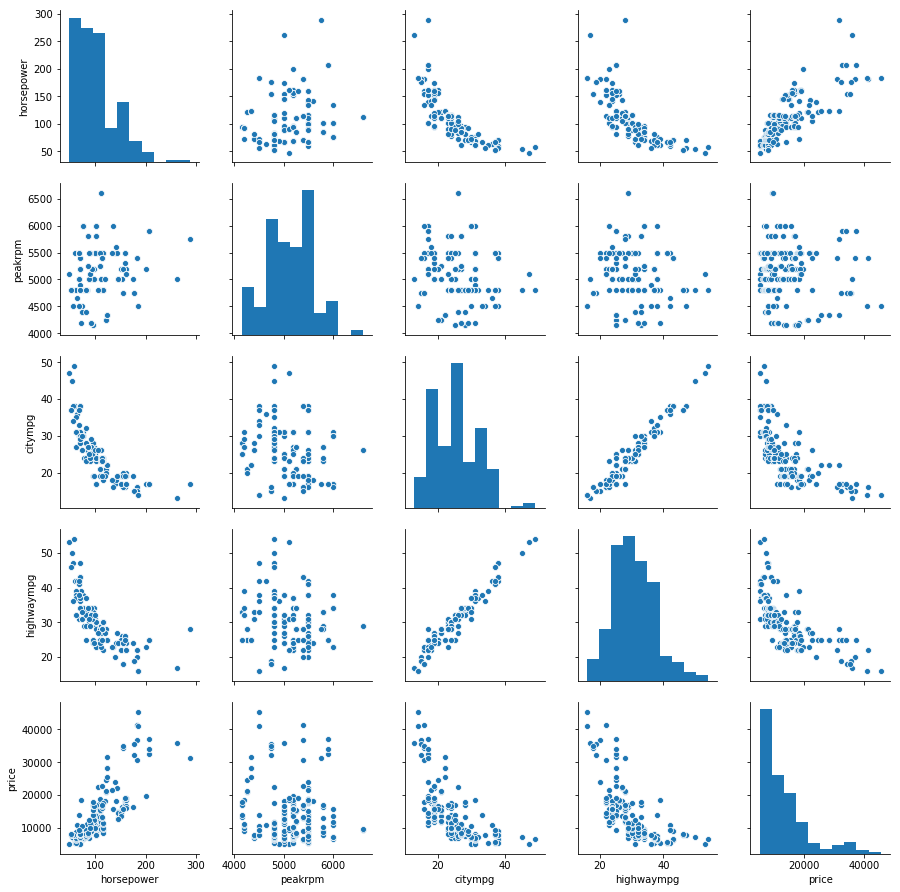

In [13]:
list_cols = car_price_df.columns[19:26]
sns.pairplot(car_price_df[list_cols])
plt.show()

Following variables look promising as well in terms of linear relationship with price

- curb weight
- engine size 
- bore ratio

The same issue of linear relationship between these variables as well - curb weight, engine size and bore ratio 

It looks like city mileage and highway mileage have a linear but negative relationship with price. Meaning increase of mileage causes decrease in price. These variable also has a strong linear relationship amongst  negative linear

Looks like we have a tough situation in our hands due to multicollinearity. Not to mention that we havent seen the relationship of these interrelated variables of the three different sets we plotted.

In [14]:
#Would be easier to get a list of categorical and numerical variables rather than type them out manually
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
quant_vars = car_price_df.select_dtypes(include=numerics).columns
categorical_vars = list(set(car_price_df.columns.values) - set(quant_vars))
print(quant_vars)
print(categorical_vars)

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
['company', 'fueltype', 'enginetype', 'fuelsystem', 'drivewheel', 'cylindernumber', 'aspiration', 'enginelocation', 'carbody', 'doornumber']


Let's now plot the categorical variables in a boxplot to get a better understanding of these variables.

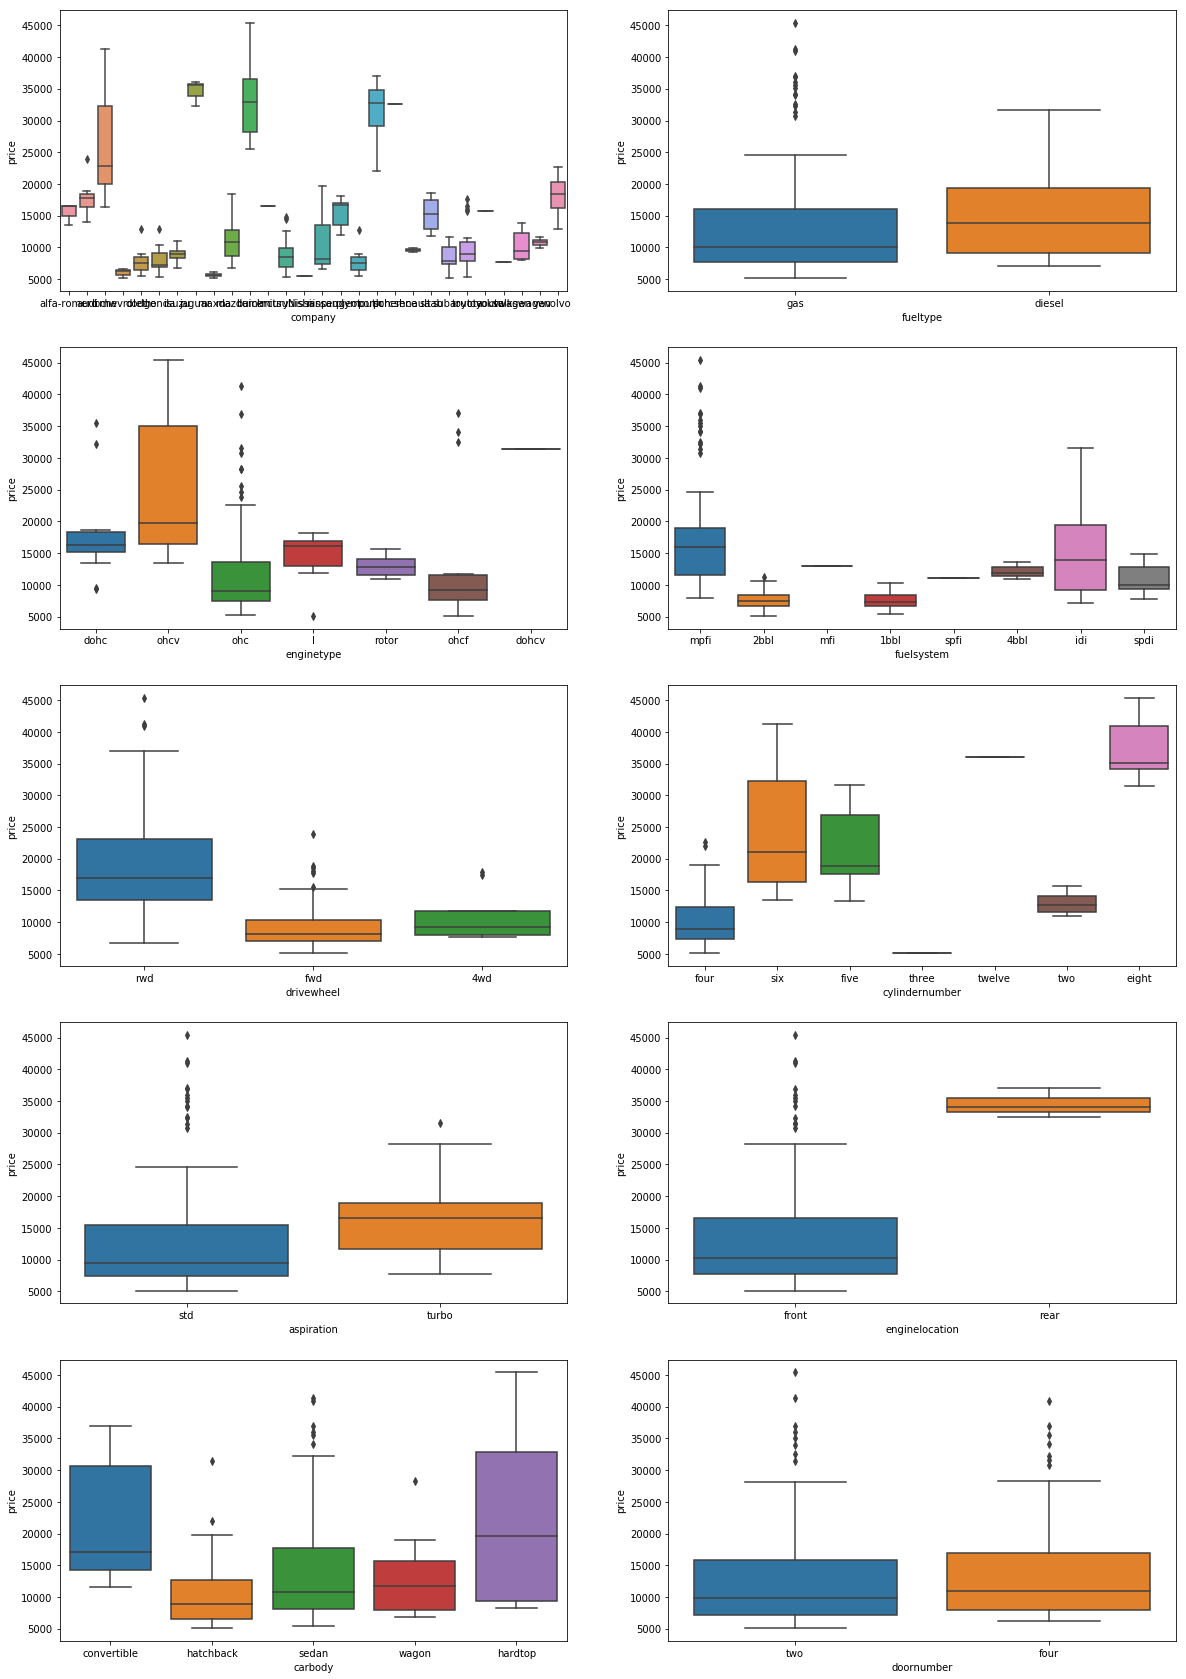

In [15]:
plt.figure(figsize=(20, 30))
for i in range(0, len(categorical_vars)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x = categorical_vars[i], y = 'price', data = car_price_df)
plt.show()

#### Conclusions from the boxplot

- aspiration     : turbo is higher priced across all quartiles and median, assuming outliers in std are ignored
- fuel systems   : mpfi and idi are higher priced.
- cylinders      : 8 cyclinders have the highest prices. A small segment of 12 cylinders also is higly priced
- drivewheeel    : rwd drivewheels are higher priced across all quartiles and median ignoring a few outliers
- enginelocation : rear engines are higher priced across all quartiles and median ignoring a few outliers
- engine type    : ohch engine type are higher priced across all quartiels, ingoring a few outliers
- carbody        : convertible is priced higher than other cars in 25th percentile. However in other percentiles is comparatble to hardtops. Convertible and hardtops are priced better than other car body types
- door number    : No significant conclusions can be drawn. Four is only slightly higher priced than two
- fuel type      : Diesel is higher priced than gas across all quartiles, ignoring a few outliers.

Lets plot carname again since it wasnt very clear in the last diagram. Perhaps we will get an idea whether specific brands have monopolized low, mid and high priced segments

There also seem to be case sensitivity issues. Nissan , nissan. Converting all names to lower case should help. There are mispelled brand names that can be corrected as well.

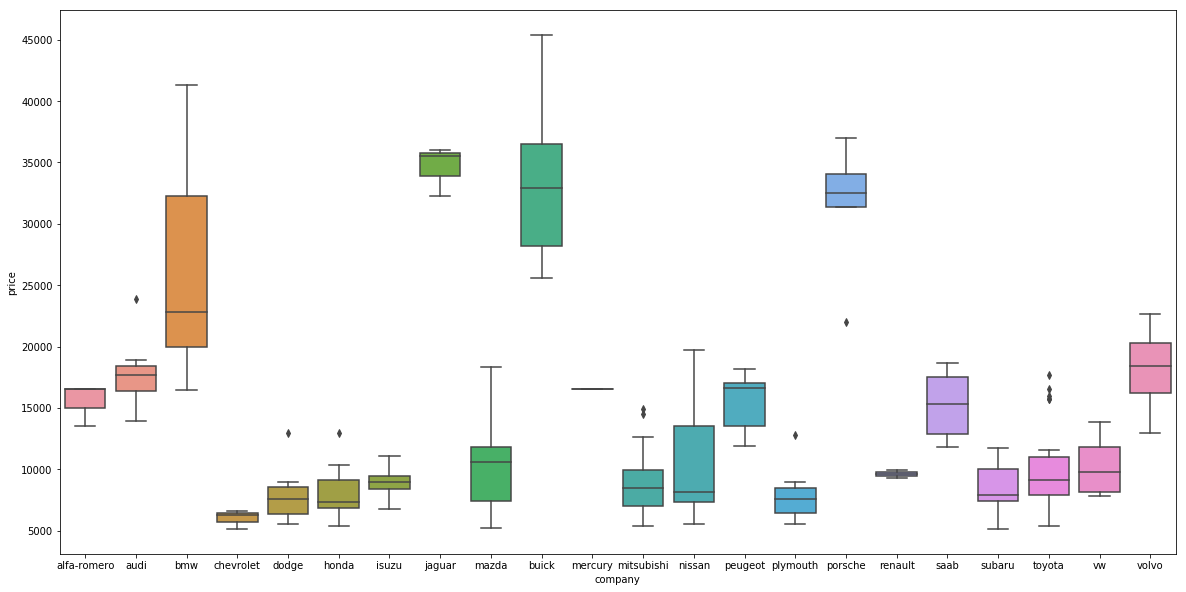

In [16]:
correction_dict = {'maxda': 'mazda', 'porcshce': 'porsche','toyouta': 'toyota','vokswagen' : 'vw', 'volkswagen' : 'vw'}
def correct(x):
    x = x.lower()
    if x not in misspelt:
        return x
    else:
        return correction_dict[x]

misspelt = ['maxda', 'porcshce','toyouta','vokswagen', 'volkswagen']
car_price_df['company'] = car_price_df['company'].apply(correct)
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'company', y = 'price', data = car_price_df)
plt.show()

#### Car companies

Car companies primarily catering to each segment is as follows : 

- high priced
    - bmw
    - jaguar
    - buick
    - porsche
- mid priced
    - alfa-romero
    - audi
    - peugeot
    - saab
    - volvo
    
Other companies fall under economy range with mazda, nissan, vw having few models in the mid priced range as well.

## 3. Data preparation

Any categorical variable with just 2 values can be represented by a binary encoding. Let us manually convert such columns to 1/0 values

In [17]:
binary_vars = ['aspiration','enginelocation','doornumber','fueltype']

def map_bin_values(x):
    return x.map({"gas" : 0, "diesel" : 1, "std" : 0, "turbo" : 1, "front" : 0, "rear" : 1, 
                 "two": 0, "four" : 1})

car_price_df[binary_vars] = car_price_df[binary_vars].apply(map_bin_values)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [18]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg        

#### Dummy variables

Creating dummy variables for other non binary categorical variables. How about we ignore company for now as the sheer number of dummy variables created seems dizzying ! 

In [19]:
car_price_df.drop('company', axis=1, inplace = True)

In [20]:
dummy_varlist = list(set(categorical_vars) - set(binary_vars) - set(['company']))
dummy_varlist

['enginetype', 'fuelsystem', 'drivewheel', 'cylindernumber', 'carbody']

In [21]:
status = pd.get_dummies(car_price_df[dummy_varlist], drop_first = True)
car_price_df = pd.concat([car_price_df, status], axis = 1)

In [22]:
car_price_df.drop(dummy_varlist, axis = 1, inplace = True)
car_price_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,0,1,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,0,0,1,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,0,0,1,0


## 4. Test train split

In [23]:
from sklearn.model_selection import train_test_split

# To always have the same rows.
np.random.seed(0)
df_train, df_test = train_test_split(car_price_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling

Using MinMax scaler to rescale all values in training set other than binary and dummy variables. The very same scaler should be re-used for test set.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[quant_vars] = scaler.fit_transform(df_train[quant_vars])

In [25]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.020979,0.342657,0.475524,0.132867
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.143818,0.476266,0.501156,0.340624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#fuelsystem_mfi and fuelsystem_spfi have only 0 values. This will not help us arrive at any conclusions. Deleting these columns
df_train.drop(['fuelsystem_mfi','fuelsystem_spfi'], axis=1, inplace = True)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 42 columns):
symboling                143 non-null float64
fueltype                 143 non-null int64
aspiration               143 non-null int64
doornumber               143 non-null int64
enginelocation           143 non-null int64
wheelbase                143 non-null float64
carlength                143 non-null float64
carwidth                 143 non-null float64
carheight                143 non-null float64
curbweight               143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
compressionratio         143 non-null float64
horsepower               143 non-null float64
peakrpm                  143 non-null float64
citympg                  143 non-null float64
highwaympg               143 non-null float64
price                    143 non-null float64
enginetype_dohcv         143 

Let us look at the correlation coefficients as well to get a good picture of interrelation between price and features and the features amongst themselves.

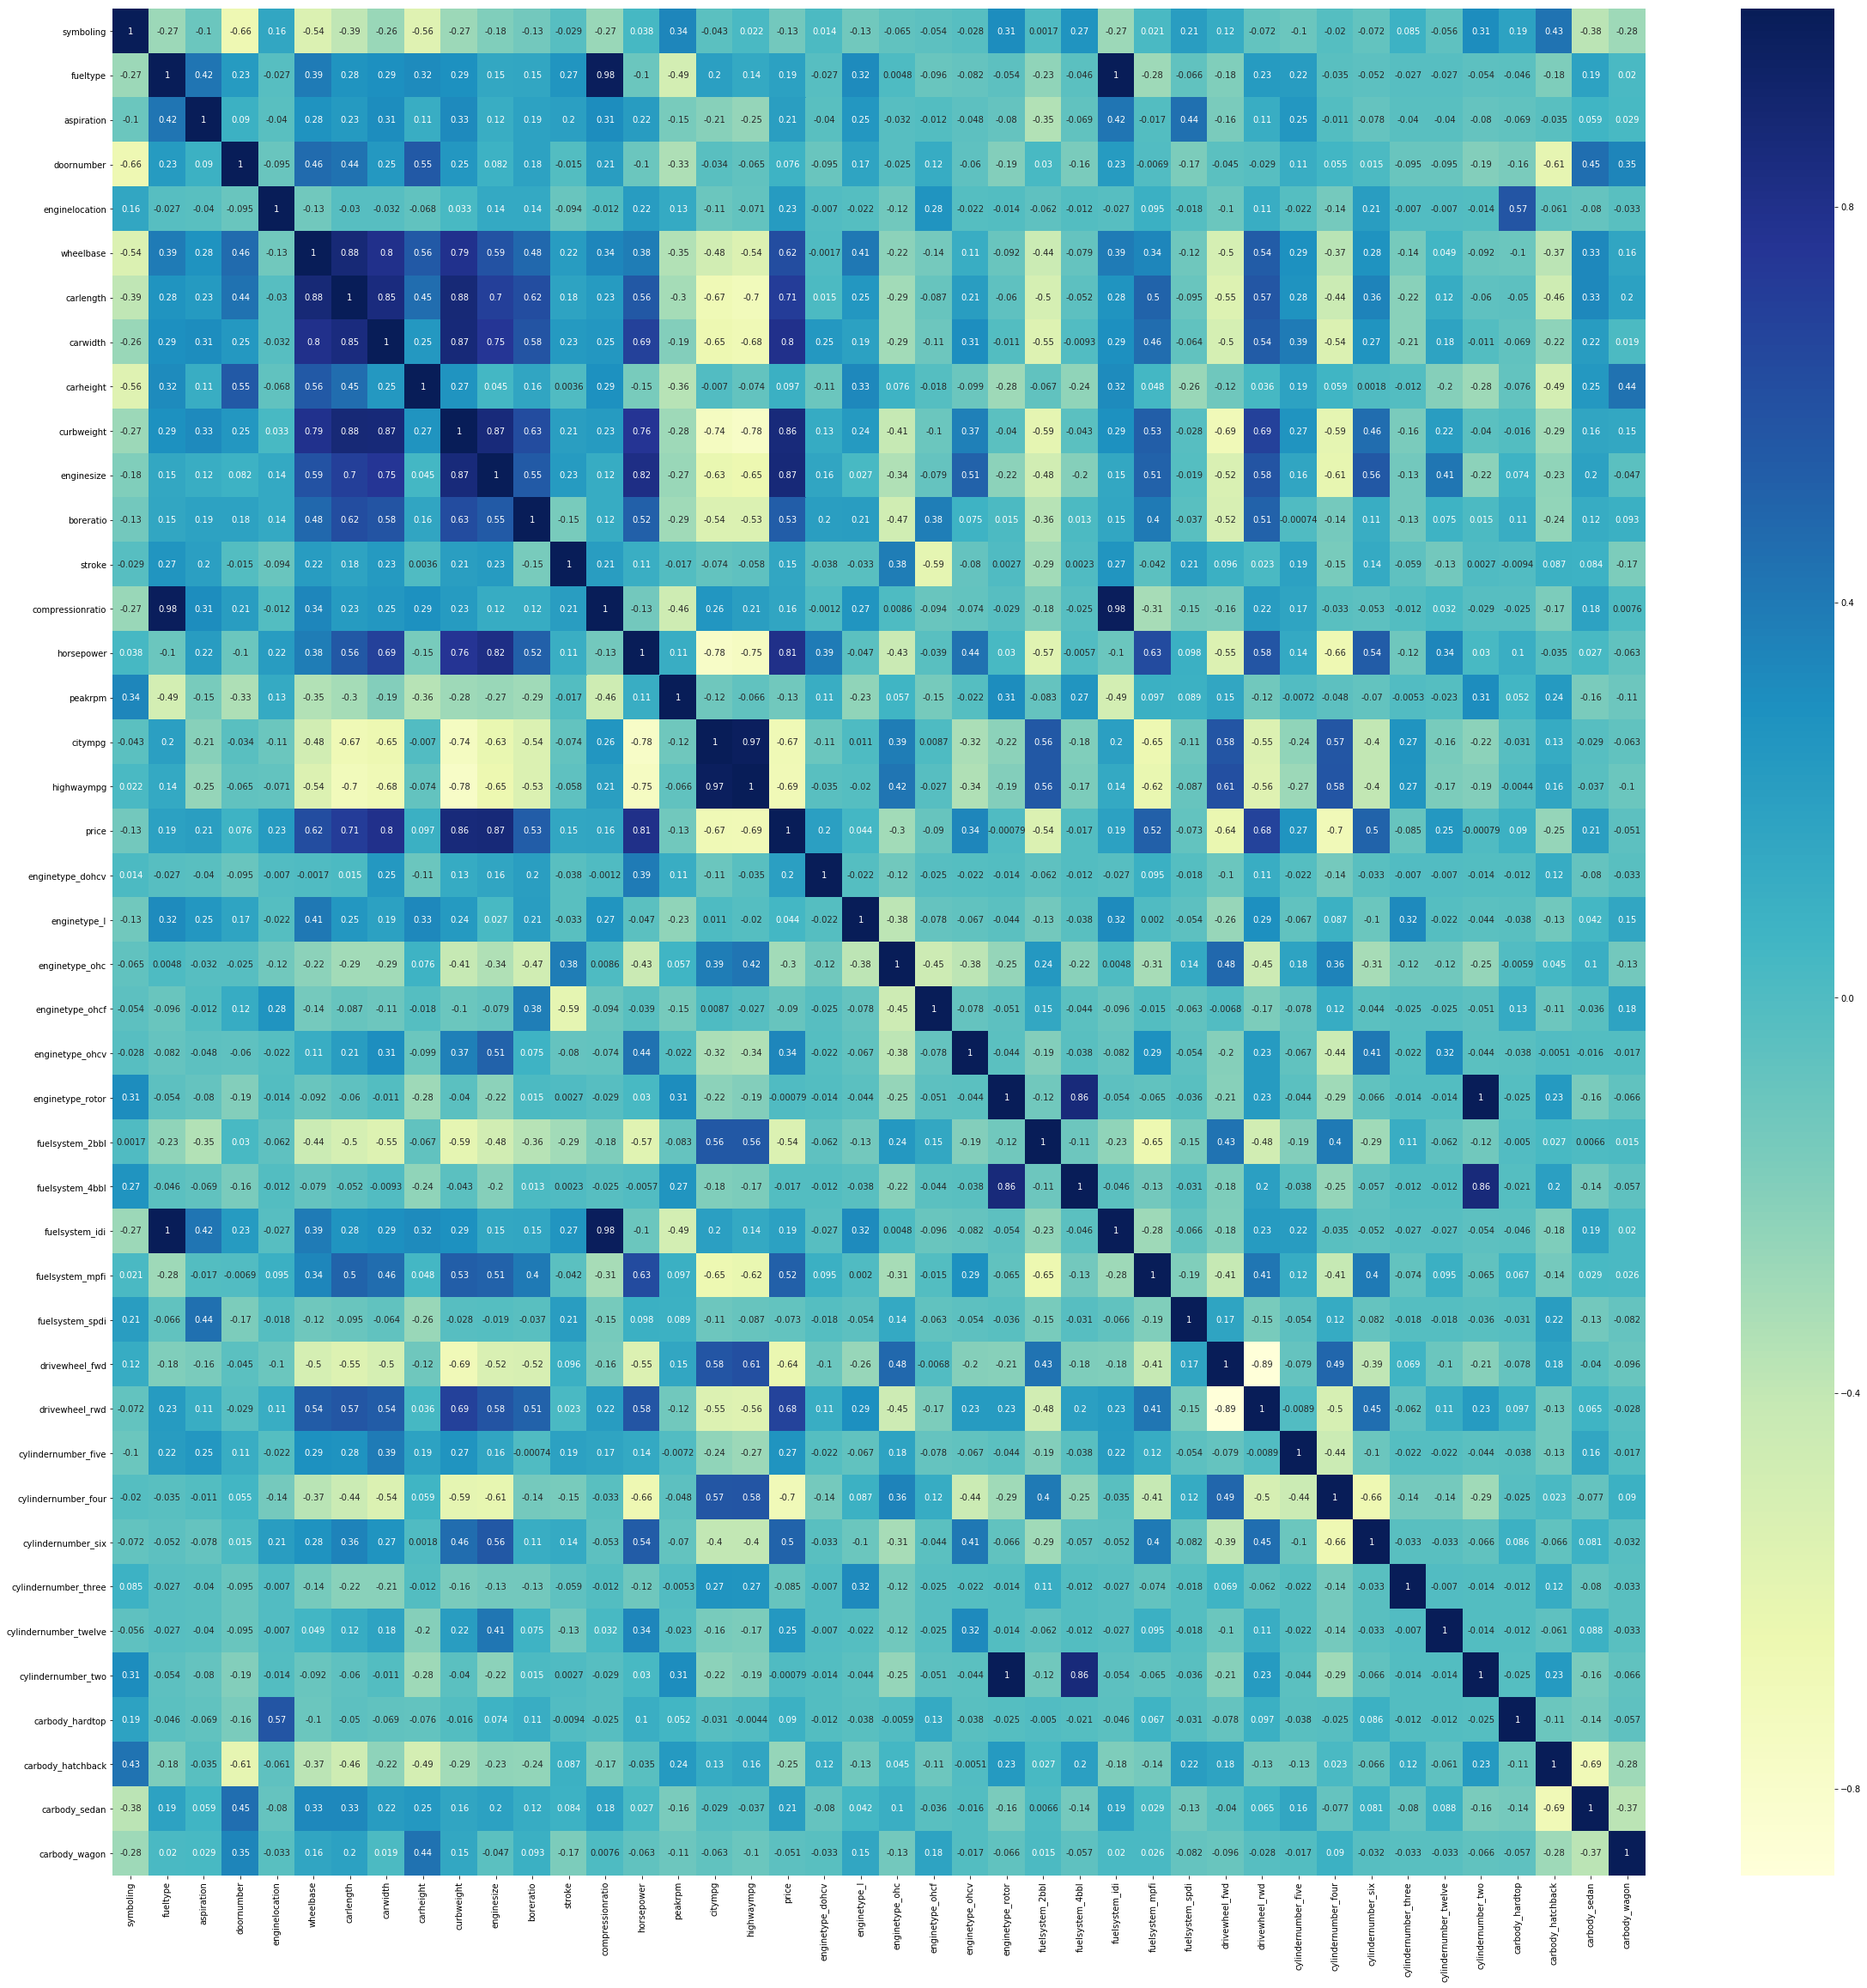

In [28]:
# Let's check the correlation coefficients again to see which variables are highly correlated
corr = df_train.corr()
plt.figure(figsize = (40, 40))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

As beautiful as the above tile pattern is : Let's look at values that are highly correlated with price alone and get a better sense of what variables we can use for the model.

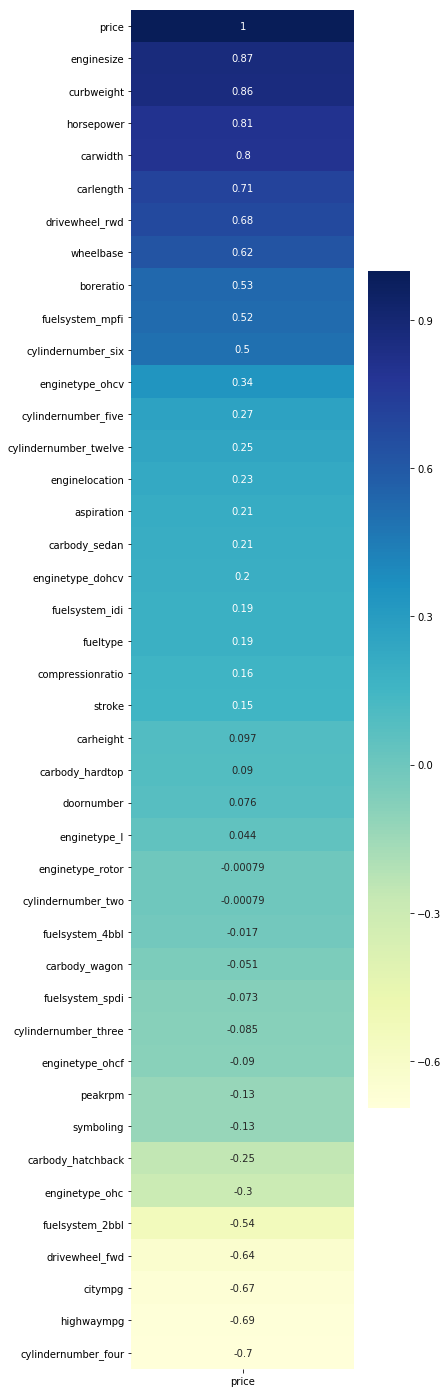

In [29]:
target_corr = corr[['price']]
target_corr.sort_values('price', ascending = False, inplace = True)
plt.figure(figsize = (5,25))
sns.heatmap(target_corr, annot = True, cmap="YlGnBu")

It appears that 10 variables have correlation coefficent > 0.5 and 5 variables have correlation coefficient < 0.5.  Due to large number of variables it would be best to run an automatic RFE initially, which coarsely narrows down the number of features. Due to high collinearity between variables. Assuming that most of these variables would end up being dropped. 
Let us have a course feature elimination of top 20 and fine tune the features as we progress and look at VIF and p value manually.

Price is highly positively correlated with the following variables that are worth looking into
 - engine size
 - curb weight
 - horse power
 - car width
 - car length
 - drivewheel rwd
 - wheel base
 - bore ratio
 - cylinder number 6
 
 However as evidenced in the scatter plots - these variables are so closely correlated that multi-collinearity would be a serious issue.

Price is highly negatively correlated with the following variables that are also worth looking into
 - fuelsystem_2bbi
 - driveweheen_fwd
 - citympg and highwaympg
 - cylindernumber_four

Mileage vs Horsepower? 

Interestingly the price is highly negatively correlated with citympg and highwaympg (miles per gallon indicative of mileage). This seems very counterintuitive to expectations that a car with better mileage will cost more. mpg variables also have high negative correlation with horsepower. This negative correlation with horsepower can be attributed to higher fuel consumption by corresponding to increased speed and acceleration. Is it possible that in a developing economy like China/India focus is on mileage, whereas in developed economies focus is on horsepower?

Since there are 13 correlated variables with price. Let us use automatic RFE for top 15 variables.  Once these have been finalized we can manually fine tune to 10 of fewer variables.

Price is highly correlated with engine size, curb weight, horse power and car width. Let's plot a scatter plot to look at this relationship in detail. Assuming that unless there is very high degree of multicollinearity distorting this relationship, a good model should have all or atleast one amongst these variable.

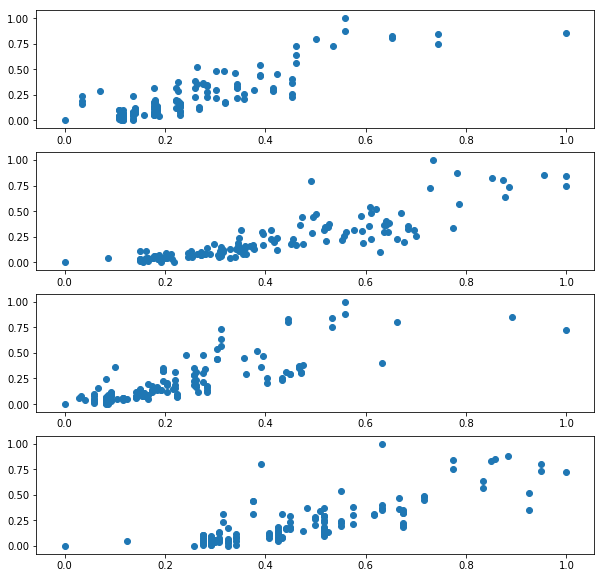

In [30]:
plt.figure(figsize=[10,10])

plt.subplot(4,1,1)
plt.scatter(df_train.enginesize, df_train.price)

plt.subplot(4,1,2)
plt.scatter(df_train.curbweight, df_train.price)

plt.subplot(4,1,3)
plt.scatter(df_train.horsepower, df_train.price)

plt.subplot(4,1,4)
plt.scatter(df_train.carwidth, df_train.price)

plt.show()

In [31]:
y_train = df_train.pop('price')
X_train = df_train

### 5. Linear Model Building using RFE (coarse) and manual fine tuning

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 11),
 ('fueltype', True, 1),
 ('aspiration', False, 10),
 ('doornumber', False, 19),
 ('enginelocation', True, 1),
 ('wheelbase', False, 2),
 ('carlength', False, 3),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 9),
 ('highwaympg', False, 8),
 ('enginetype_dohcv', False, 14),
 ('enginetype_l', False, 17),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 21),
 ('fuelsystem_4bbl', False, 16),
 ('fuelsystem_idi', True, 1),
 ('fuelsystem_mpfi', False, 20),
 ('fuelsystem_spdi', True, 1),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 12),
 ('cylindernumber_five', False, 18),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 22),
 ('cylind

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_idi', 'fuelsystem_spdi',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [36]:
#Dropped columns
X_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'citympg', 'highwaympg', 'enginetype_dohcv',
       'enginetype_l', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mpfi',
       'drivewheel_fwd', 'drivewheel_rwd', 'cylindernumber_five',
       'cylindernumber_six', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon'],
      dtype='object')

Using statsmodel on top of RFE to get detailed statistics for fine tuning the model

In [37]:
X_train_rfe = X_train[col]

In [38]:
# Adding a constant
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [40]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.74e-65
Time:                        20:08:33   Log-Likelihood:                 214.81
No. Observations:                 143   AIC:                            -391.6
Df Residuals:                     124   BIC:                            -335.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1653      0.059     -2.815      0.006      -0.282      -0.049
fueltype                  0.2170      0.073      2.970      0.004       0.072       0.362
enginelocation            0.1788      0.070      2.548      0.012       0.040       0.318
carwidth                  0.2320      0.061      3.812      0.000       0.112       0.352
curbweight                0.1664      0.081      2.048      0.043       0.006       0.327
enginesize                1.6385      0.150     10.916      0.000       1.341       1.936
boreratio                -0.3206      0.061     -5.217      0.000      -0.442      -0.199
stroke                   -0.5329      0.057     -9.322      0.000      -0.646      -0.420
compressionratio         -0.3934      0.171     -2.300      0.023      -0.732      -0.055
horsepower                0.2712      0.084      3.219      0.002       0.104       0.438
peakrpm                   0.1159      0.038      3.037      0.003       0.040       0.191
enginetype_ohc            0.1490      0.020      7.637      0.000       0.110       0.188
enginetype_ohcf           0.0499      0.032      1.549      0.124      -0.014       0.114
enginetype_ohcv          -0.1206      0.029     -4.221      0.000      -0.177      -0.064
enginetype_rotor          0.2513      0.031      8.058      0.000       0.190       0.313
fuelsystem_idi            0.2170      0.073      2.970      0.004       0.072       0.362
fuelsystem_spdi          -0.0846      0.031     -2.738      0.007      -0.146      -0.023
cylindernumber_four       0.1047      0.032      3.274      0.001       0.041       0.168
cylindernumber_three      0.4673      0.080      5.871      0.000       0.310       0.625
cylindernumber_twelve    -0.6567      0.100     -6.543      0.000      -0.855      -0.458
cylindernumber_two        0.2513      0.031      8.058      0.000       0.190       0.313
==============================================================================
Omnibus:                        9.824   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               12.537
Skew:                           0.423   Prob(JB):                      0.00189
Kurtosis:                       4.179   Cond. No.                     3.27e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.45e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The value of R squared (0.937) and R adjusted (0.928) are close and are very good. Let us drop insignificant variables. However with such good values of R squared - does it indicate overfitting. Need to keep a close eye on test data and check if it is comparable.

In [41]:
#Dropping enginetype_ohcf as it is insignificant

X_train_new = X_train_rfe.drop(['enginetype_ohcf'], axis=1)

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,cylindernumber_two,inf
1,fueltype,inf
14,fuelsystem_idi,inf
13,enginetype_rotor,inf
0,const,95.60
8,compressionratio,67.86
5,enginesize,22.33
4,curbweight,11.20
9,horsepower,7.76
16,cylindernumber_four,7.03


Let us drop the infinite VIFS one by one. First to go should be one with least correlation coefficient with price. Then let us look at number of rows in training data that has this value as a second criterion

cylindernumber_two :-0.00079
fueltype           : 0.19
enginetype_rotor   : -0.00079
fuelsystem_idi     : 0.19

In [43]:
print(X_train_new['cylindernumber_two'].value_counts())
print(X_train_new['enginetype_rotor'].value_counts())

0    139
1      4
Name: cylindernumber_two, dtype: int64
0    139
1      4
Name: enginetype_rotor, dtype: int64


In [44]:
#Deleting rotor at the moment -  chosen at random
X_train_new = X_train_new.drop(['enginetype_rotor'], axis=1)

In [45]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,fuelsystem_idi,inf
1,fueltype,inf
0,const,95.60
8,compressionratio,67.86
5,enginesize,22.33
4,curbweight,11.20
9,horsepower,7.76
15,cylindernumber_four,7.03
3,carwidth,5.34
6,boreratio,5.32


In [46]:
print(X_train_new['fuelsystem_idi'].value_counts())
print(X_train_new['fueltype'].value_counts())

0    130
1     13
Name: fuelsystem_idi, dtype: int64
0    130
1     13
Name: fueltype, dtype: int64


In [47]:
#Deleting idi at the moment -  chosen at random
X_train_new = X_train_new.drop(['fuelsystem_idi'], axis=1)

In [48]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,95.60
1,fueltype,73.83
8,compressionratio,67.86
5,enginesize,22.33
4,curbweight,11.20
9,horsepower,7.76
14,cylindernumber_four,7.03
3,carwidth,5.34
6,boreratio,5.32
17,cylindernumber_two,3.89


Let us look at model statics again and determine if R values are good. Verify p values again and delete based on insignificance 

In [49]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.35e-66
Time:                        20:08:33   Log-Likelihood:                 213.44
No. Observations:                 143   AIC:                            -390.9
Df Residuals:                     125   BIC:                            -337.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1114      0.048     -2.342      0.021      -0.206      -0.017
fueltype                  0.4665      0.145      3.208      0.002       0.179       0.754
enginelocation            0.2102      0.068      3.112      0.002       0.077       0.344
carwidth                  0.2363      0.061      3.865      0.000       0.115       0.357
curbweight                0.1259      0.077      1.627      0.106      -0.027       0.279
enginesize                1.6035      0.149     10.746      0.000       1.308       1.899
boreratio                -0.2753      0.054     -5.064      0.000      -0.383      -0.168
stroke                   -0.5468      0.057     -9.629      0.000      -0.659      -0.434
compressionratio         -0.4376      0.170     -2.581      0.011      -0.773      -0.102
horsepower                0.2394      0.082      2.914      0.004       0.077       0.402
peakrpm                   0.1093      0.038      2.866      0.005       0.034       0.185
enginetype_ohc            0.1334      0.017      7.936      0.000       0.100       0.167
enginetype_ohcv          -0.1285      0.028     -4.550      0.000      -0.184      -0.073
fuelsystem_spdi          -0.0789      0.031     -2.555      0.012      -0.140      -0.018
cylindernumber_four       0.0848      0.029      2.880      0.005       0.027       0.143
cylindernumber_three      0.4205      0.074      5.678      0.000       0.274       0.567
cylindernumber_twelve    -0.6164      0.097     -6.323      0.000      -0.809      -0.423
cylindernumber_two        0.4666      0.058      8.015      0.000       0.351       0.582
==============================================================================
Omnibus:                        9.214   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               13.757
Skew:                           0.324   Prob(JB):                      0.00103
Kurtosis:                       4.375   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Dropping curbweight as it is insignificant

X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [51]:
#Calculating VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [52]:
print(vif)

                 Features    VIF
0                   const  88.78
1                fueltype  63.42
7        compressionratio  59.77
4              enginesize  17.67
8              horsepower   7.66
13    cylindernumber_four   7.00
5               boreratio   5.30
3                carwidth   4.09
16     cylindernumber_two   3.71
6                  stroke   3.28
15  cylindernumber_twelve   2.72
10         enginetype_ohc   2.54
9                 peakrpm   2.35
11        enginetype_ohcv   1.95
14   cylindernumber_three   1.61
12        fuelsystem_spdi   1.59
2          enginelocation   1.30


Deleting fueltype due to high VIF. Let us take a decision on the final model whether constant needs to be removed. Since a high VIF for constant does not really make sense at the moment.

In [53]:
#Dropping curbweight as it is insignificant
X_train_new = X_train_new.drop(['fueltype'], axis=1)

In [54]:
#Calculating VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,66.74
3,enginesize,17.38
7,horsepower,7.63
12,cylindernumber_four,6.99
4,boreratio,5.27
2,carwidth,3.92
15,cylindernumber_two,3.63
5,stroke,3.09
14,cylindernumber_twelve,2.59
9,enginetype_ohc,2.47


In [55]:
#Let us look at whether the model statistics have any significant drop
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.24e-64
Time:                        20:08:33   Log-Likelihood:                 203.01
No. Observations:                 143   AIC:                            -374.0
Df Residuals:                     127   BIC:                            -326.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1848      0.042     -4.358      0.000      -0.269      -0.101
enginelocation            0.1834      0.071      2.579      0.011       0.043       0.324
carwidth                  0.3297      0.056      5.900      0.000       0.219       0.440
enginesize                1.6436      0.140     11.701      0.000       1.366       1.922
boreratio                -0.2632      0.058     -4.557      0.000      -0.377      -0.149
stroke                   -0.5062      0.058     -8.728      0.000      -0.621      -0.391
compressionratio          0.1134      0.029      3.928      0.000       0.056       0.170
horsepower                0.2746      0.087      3.158      0.002       0.103       0.447
peakrpm                   0.0692      0.039      1.754      0.082      -0.009       0.147
enginetype_ohc            0.1188      0.018      6.760      0.000       0.084       0.154
enginetype_ohcv          -0.1352      0.030     -4.532      0.000      -0.194      -0.076
fuelsystem_spdi          -0.0269      0.029     -0.927      0.356      -0.084       0.031
cylindernumber_four       0.0839      0.031      2.676      0.008       0.022       0.146
cylindernumber_three      0.4040      0.079      5.123      0.000       0.248       0.560
cylindernumber_twelve    -0.7288      0.100     -7.271      0.000      -0.927      -0.530
cylindernumber_two        0.4519      0.060      7.532      0.000       0.333       0.571
==============================================================================
Omnibus:                       10.489   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               22.095
Skew:                           0.203   Prob(JB):                     1.59e-05
Kurtosis:                       4.882   Cond. No.                         61.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#Dropping fuelsystem_spdi as it is insignificant
X_train_new = X_train_new.drop(['fuelsystem_spdi'], axis=1)

In [57]:
#Calculating VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.77
3,enginesize,17.29
7,horsepower,6.91
11,cylindernumber_four,6.78
4,boreratio,5.26
2,carwidth,3.89
14,cylindernumber_two,3.62
5,stroke,3.01
13,cylindernumber_twelve,2.59
9,enginetype_ohc,2.46


In [58]:
#Dropping engine size due to high VIF
X_train_new = X_train_new.drop(['enginesize'], axis=1)

In [59]:
#Let us look at whether the model statistics have any significant drop
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     53.77
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.36e-45
Time:                        20:08:33   Log-Likelihood:                 149.88
No. Observations:                 143   AIC:                            -271.8
Df Residuals:                     129   BIC:                            -230.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0262      0.057     -0.459      0.647      -0.139       0.087
enginelocation            0.2980      0.101      2.941      0.004       0.098       0.499
carwidth                  0.4004      0.080      5.023      0.000       0.243       0.558
boreratio                 0.1265      0.068      1.854      0.066      -0.009       0.262
stroke                   -0.0921      0.064     -1.433      0.154      -0.219       0.035
compressionratio          0.0772      0.041      1.874      0.063      -0.004       0.159
horsepower                0.5047      0.115      4.392      0.000       0.277       0.732
peakrpm                  -0.0697      0.054     -1.300      0.196      -0.176       0.036
enginetype_ohc            0.0788      0.025      3.183      0.002       0.030       0.128
enginetype_ohcv          -0.0129      0.040     -0.322      0.748      -0.092       0.066
cylindernumber_four      -0.1477      0.035     -4.246      0.000      -0.216      -0.079
cylindernumber_three      0.0581      0.105      0.552      0.582      -0.150       0.266
cylindernumber_twelve     0.0412      0.110      0.376      0.708      -0.176       0.258
cylindernumber_two       -0.0397      0.062     -0.637      0.525      -0.163       0.084
==============================================================================
Omnibus:                       48.015   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.929
Skew:                           1.265   Prob(JB):                     7.54e-33
Kurtosis:                       7.293   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There was a significant drop in model statics of Rsquared to 80 percent. Let us add the engine size back and delete constant instead.

In [60]:
X_train_new = pd.concat([X_train_new, X_train['enginesize']], axis = 1)
X_train_new = X_train_new.drop(['const'], axis=1)

In [61]:
#Let us look at whether the model statistics have any significant drop
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     113.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.97e-65
Time:                        20:08:33   Log-Likelihood:                 202.53
No. Observations:                 143   AIC:                            -375.1
Df Residuals:                     128   BIC:                            -330.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1781      0.042     -4.264      0.000      -0.261      -0.095
enginelocation            0.1849      0.071      2.602      0.010       0.044       0.325
carwidth                  0.3338      0.056      5.996      0.000       0.224       0.444
boreratio                -0.2611      0.058     -4.527      0.000      -0.375      -0.147
stroke                   -0.5148      0.057     -8.997      0.000      -0.628      -0.402
compressionratio          0.1151      0.029      3.997      0.000       0.058       0.172
horsepower                0.2498      0.083      3.021      0.003       0.086       0.413
peakrpm                   0.0733      0.039      1.872      0.063      -0.004       0.151
enginetype_ohc            0.1175      0.018      6.711      0.000       0.083       0.152
enginetype_ohcv          -0.1363      0.030     -4.576      0.000      -0.195      -0.077
cylindernumber_four       0.0788      0.031      2.555      0.012       0.018       0.140
cylindernumber_three      0.3986      0.079      5.071      0.000       0.243       0.554
cylindernumber_twelve    -0.7260      0.100     -7.250      0.000      -0.924      -0.528
cylindernumber_two        0.4494      0.060      7.503      0.000       0.331       0.568
enginesize                1.6528      0.140     11.803      0.000       1.376       1.930
==============================================================================
Omnibus:                       11.191   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               22.890
Skew:                           0.260   Prob(JB):                     1.07e-05
Kurtosis:                       4.890   Cond. No.                         61.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#Dropping peakrpm size due to low p value (insignificance)
X_train_new = X_train_new.drop(['peakrpm'], axis=1)

In [63]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.97e-65
Time:                        20:08:33   Log-Likelihood:                 200.60
No. Observations:                 143   AIC:                            -373.2
Df Residuals:                     129   BIC:                            -331.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1465      0.039     -3.798      0.000      -0.223      -0.070
enginelocation            0.2114      0.070      3.007      0.003       0.072       0.350
carwidth                  0.3455      0.056      6.187      0.000       0.235       0.456
boreratio                -0.2792      0.057     -4.863      0.000      -0.393      -0.166
stroke                   -0.5052      0.058     -8.779      0.000      -0.619      -0.391
compressionratio          0.0986      0.028      3.563      0.001       0.044       0.153
horsepower                0.3174      0.075      4.226      0.000       0.169       0.466
enginetype_ohc            0.1189      0.018      6.733      0.000       0.084       0.154
enginetype_ohcv          -0.1321      0.030     -4.405      0.000      -0.191      -0.073
cylindernumber_four       0.0811      0.031      2.607      0.010       0.020       0.143
cylindernumber_three      0.3973      0.079      5.006      0.000       0.240       0.554
cylindernumber_twelve    -0.7113      0.101     -7.058      0.000      -0.911      -0.512
cylindernumber_two        0.4607      0.060      7.657      0.000       0.342       0.580
enginesize                1.5717      0.134     11.690      0.000       1.306       1.838
==============================================================================
Omnibus:                       14.510   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.889
Skew:                           0.387   Prob(JB):                     1.96e-07
Kurtosis:                       5.142   Cond. No.                         58.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Calculating VIF again

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,enginesize,51.61
3,stroke,37.40
2,boreratio,34.67
1,carwidth,25.64
8,cylindernumber_four,16.00
5,horsepower,15.49
6,enginetype_ohc,6.86
11,cylindernumber_two,3.00
4,compressionratio,2.57
10,cylindernumber_twelve,2.45


Still too high. Might have to drop enginesize. However since dropping enginesize caused R2 to decrease from >0.91 to 0.81, let us try a reverse method of adding non categorical variables and computing statistics and VIF. If that yields a similar result of R squared with the variables initially identified to be highly correlated that may be a better predictive model. 

#### Earmarked the above model ^

In [65]:
lm_opt1 = lm

In [66]:
trial_variables = ['enginesize', 'stroke', 'boreratio', 'carwidth', 'horsepower', 'compressionratio', 'enginelocation']
X_train_trial = X_train[trial_variables]

In [67]:
#not adding constant since we had already decided to drop it

lm_trial = sm.OLS(y_train,X_train_trial).fit()
lm_trial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.67e-70
Time:                        20:08:33   Log-Likelihood:                 143.46
No. Observations:                 143   AIC:                            -272.9
Df Residuals:                     136   BIC:                            -252.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
enginesize           0.6878      0.099      6.938      0.000       0.492       0.884
stroke              -0.2284      0.035     -6.570      0.000      -0.297      -0.160
boreratio           -0.1540      0.043     -3.611      0.000      -0.238      -0.070
carwidth             0.3669      0.075      4.913      0.000       0.219       0.515
horsepower           0.3080      0.096      3.208      0.002       0.118       0.498
compressionratio     0.0820      0.038      2.138      0.034       0.006       0.158
enginelocation       0.3044      0.099      3.077      0.003       0.109       0.500
==============================================================================
Omnibus:                       50.102   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.446
Skew:                           1.241   Prob(JB):                     1.98e-41
Kurtosis:                       8.030   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p values are good. So let's calculate VIF and proceed further with our trial model

In [68]:
#Calculating VIF again

vif = pd.DataFrame()
X = X_train_trial
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,carwidth,23.79
0,enginesize,13.92
4,horsepower,12.55
2,boreratio,9.13
1,stroke,6.50
5,compressionratio,2.34
6,enginelocation,1.18


In [69]:
#Interesting. Let us remove the highly correlated variables and add more variables from the earmarked model.
#dropping carwidth

In [70]:
X_train_trial.drop('carwidth', axis=1, inplace = True)

In [71]:
lm_trial = sm.OLS(y_train,X_train_trial).fit()
lm_trial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.98e-66
Time:                        20:08:34   Log-Likelihood:                 131.78
No. Observations:                 143   AIC:                            -251.6
Df Residuals:                     137   BIC:                            -233.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
enginesize           0.7993      0.104      7.661      0.000       0.593       1.006
stroke              -0.1474      0.033     -4.455      0.000      -0.213      -0.082
boreratio           -0.0496      0.040     -1.240      0.217      -0.129       0.029
horsepower           0.4648      0.098      4.749      0.000       0.271       0.658
compressionratio     0.1406      0.039      3.569      0.000       0.063       0.219
enginelocation       0.1622      0.102      1.586      0.115      -0.040       0.364
==============================================================================
Omnibus:                       26.559   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.947
Skew:                           0.737   Prob(JB):                     1.30e-14
Kurtosis:                       5.925   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p value of bore ratio is high. Let us drop the bore ratio from this model as it is insignificant.

In [72]:
X_train_trial.drop('boreratio', axis=1, inplace = True)

In [73]:
#Calculating VIF again

vif = pd.DataFrame()
X = X_train_trial
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,12.80
2,horsepower,10.50
1,stroke,4.19
3,compressionratio,2.04
4,enginelocation,1.08


In [74]:
lm_trial = sm.OLS(y_train,X_train_trial).fit()
lm_trial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     250.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.55e-67
Time:                        20:08:34   Log-Likelihood:                 130.98
No. Observations:                 143   AIC:                            -252.0
Df Residuals:                     138   BIC:                            -237.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
enginesize           0.7771      0.103      7.545      0.000       0.573       0.981
stroke              -0.1642      0.030     -5.430      0.000      -0.224      -0.104
horsepower           0.4353      0.095      4.576      0.000       0.247       0.623
compressionratio     0.1310      0.039      3.384      0.001       0.054       0.208
enginelocation       0.1587      0.102      1.550      0.123      -0.044       0.361
==============================================================================
Omnibus:                       28.624   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.561
Skew:                           0.840   Prob(JB):                     2.60e-14
Kurtosis:                       5.771   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#Looks like we may have to drop enginelocation due to insignificance. 
X_train_trial.drop('enginelocation', axis=1, inplace = True)
lm_trial = sm.OLS(y_train,X_train_trial).fit()
lm_trial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.46e-68
Time:                        20:08:34   Log-Likelihood:                 129.74
No. Observations:                 143   AIC:                            -251.5
Df Residuals:                     139   BIC:                            -239.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
enginesize           0.7669      0.103      7.424      0.000       0.563       0.971
stroke              -0.1712      0.030     -5.700      0.000      -0.231      -0.112
horsepower           0.4635      0.094      4.940      0.000       0.278       0.649
compressionratio     0.1352      0.039      3.483      0.001       0.058       0.212
==============================================================================
Omnibus:                       24.063   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.607
Skew:                           0.716   Prob(JB):                     1.03e-11
Kurtosis:                       5.539   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#R2 is slightly better than last time we dropped and re-added engine size in the earmarked model. Let us proceed further
#Calculating VIF again

vif = pd.DataFrame()
X = X_train_trial
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,12.75
2,horsepower,10.12
1,stroke,4.10
3,compressionratio,2.03


In [77]:
X_train_trial.drop('enginesize', axis=1, inplace = True)
lm_trial = sm.OLS(y_train,X_train_trial).fit()
lm_trial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     283.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.80e-59
Time:                        20:08:34   Log-Likelihood:                 105.86
No. Observations:                 143   AIC:                            -205.7
Df Residuals:                     140   BIC:                            -196.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke              -0.1131      0.034     -3.312      0.001      -0.181      -0.046
horsepower           1.0572      0.058     18.303      0.000       0.943       1.171
compressionratio     0.2384      0.043      5.587      0.000       0.154       0.323
==============================================================================
Omnibus:                       51.043   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.348
Skew:                           1.450   Prob(JB):                     4.96e-29
Kurtosis:                       6.670   Cond. No.                         4.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
X = X_train_trial
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,stroke,3.82
1,horsepower,2.77
2,compressionratio,1.77


VIF values are good. R squared and adjusted R squared are good as well. We could stop here with our trial model as a possible choice. 

However in our earmarked model, let us proceed to narrow down variables, since we have some categorical values there that may give a better R squared and adjusted R squared without high VIF. It looks like we would have to drop engine size either way, which was the reason we thought to look at a different model.

In [79]:
lm_opt2 = lm_trial

In [80]:
X_train_new.drop('enginesize', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.05e-66
Time:                        20:08:34   Log-Likelihood:                 148.45
No. Observations:                 143   AIC:                            -272.9
Df Residuals:                     131   BIC:                            -237.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation            0.2607      0.099      2.637      0.009       0.065       0.456
carwidth                  0.3674      0.076      4.865      0.000       0.218       0.517
boreratio                 0.1608      0.061      2.625      0.010       0.040       0.282
stroke                   -0.0964      0.062     -1.567      0.120      -0.218       0.025
compressionratio          0.0912      0.040      2.307      0.023       0.013       0.169
horsepower                0.4213      0.103      4.099      0.000       0.218       0.625
enginetype_ohc            0.0679      0.023      2.900      0.004       0.022       0.114
enginetype_ohcv          -0.0242      0.038     -0.640      0.523      -0.099       0.051
cylindernumber_four      -0.1828      0.025     -7.378      0.000      -0.232      -0.134
cylindernumber_three     -0.0018      0.094     -0.019      0.985      -0.188       0.185
cylindernumber_twelve     0.0787      0.107      0.732      0.465      -0.134       0.291
cylindernumber_two       -0.0998      0.050     -1.995      0.048      -0.199      -0.001
==============================================================================
Omnibus:                       46.908   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.364
Skew:                           1.233   Prob(JB):                     4.48e-32
Kurtosis:                       7.260   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#cylindernumber_three is highly insignificant. Let's drop it.
X_train_new.drop('cylindernumber_three', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.68e-67
Time:                        20:08:34   Log-Likelihood:                 148.45
No. Observations:                 143   AIC:                            -274.9
Df Residuals:                     132   BIC:                            -242.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation            0.2607      0.098      2.647      0.009       0.066       0.456
carwidth                  0.3677      0.074      4.958      0.000       0.221       0.514
boreratio                 0.1606      0.060      2.677      0.008       0.042       0.279
stroke                   -0.0968      0.059     -1.648      0.102      -0.213       0.019
compressionratio          0.0912      0.039      2.319      0.022       0.013       0.169
horsepower                0.4216      0.101      4.157      0.000       0.221       0.622
enginetype_ohc            0.0680      0.023      2.935      0.004       0.022       0.114
enginetype_ohcv          -0.0242      0.038     -0.643      0.521      -0.099       0.050
cylindernumber_four      -0.1827      0.024     -7.536      0.000      -0.231      -0.135
cylindernumber_twelve     0.0784      0.106      0.737      0.462      -0.132       0.289
cylindernumber_two       -0.0997      0.049     -2.013      0.046      -0.198      -0.002
==============================================================================
Omnibus:                       46.940   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.545
Skew:                           1.233   Prob(JB):                     4.10e-32
Kurtosis:                       7.263   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#enginetype_ohcv is highly insignificant. Let's drop it.
X_train_new.drop('enginetype_ohcv', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.60e-68
Time:                        20:08:34   Log-Likelihood:                 148.22
No. Observations:                 143   AIC:                            -276.4
Df Residuals:                     133   BIC:                            -246.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
enginelocation            0.2654      0.098      2.708      0.008       0.072       0.459
carwidth                  0.3604      0.073      4.929      0.000       0.216       0.505
boreratio                 0.1664      0.059      2.812      0.006       0.049       0.283
stroke                   -0.1003      0.058     -1.720      0.088      -0.216       0.015
compressionratio          0.0930      0.039      2.375      0.019       0.016       0.170
horsepower                0.4130      0.100      4.117      0.000       0.215       0.611
enginetype_ohc            0.0716      0.022      3.200      0.002       0.027       0.116
cylindernumber_four      -0.1826      0.024     -7.546      0.000      -0.230      -0.135
cylindernumber_twelve     0.0648      0.104      0.623      0.535      -0.141       0.270
cylindernumber_two       -0.0955      0.049     -1.951      0.053      -0.192       0.001
==============================================================================
Omnibus:                       46.941   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.849
Skew:                           1.230   Prob(JB):                     2.13e-32
Kurtosis:                       7.293   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#cylindernumber_twelve is highly insignificant. Let's drop it.
X_train_new.drop('cylindernumber_twelve', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.42e-69
Time:                        20:08:34   Log-Likelihood:                 148.01
No. Observations:                 143   AIC:                            -278.0
Df Residuals:                     134   BIC:                            -251.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation          0.2575      0.097      2.656      0.009       0.066       0.449
carwidth                0.3601      0.073      4.936      0.000       0.216       0.504
boreratio               0.1574      0.057      2.750      0.007       0.044       0.271
stroke                 -0.1121      0.055     -2.038      0.044      -0.221      -0.003
compressionratio        0.0991      0.038      2.624      0.010       0.024       0.174
horsepower              0.4414      0.089      4.954      0.000       0.265       0.618
enginetype_ohc          0.0730      0.022      3.284      0.001       0.029       0.117
cylindernumber_four    -0.1788      0.023     -7.648      0.000      -0.225      -0.133
cylindernumber_two     -0.0926      0.049     -1.905      0.059      -0.189       0.004
==============================================================================
Omnibus:                       44.943   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.796
Skew:                           1.174   Prob(JB):                     7.26e-31
Kurtosis:                       7.217   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#cylindernumber_two is slightly above the insignificance level. Let us drop that as well before looking into VIF
X_train_new.drop('cylindernumber_two', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.87e-70
Time:                        20:08:34   Log-Likelihood:                 146.10
No. Observations:                 143   AIC:                            -276.2
Df Residuals:                     135   BIC:                            -252.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation          0.2620      0.098      2.677      0.008       0.068       0.456
carwidth                0.3701      0.073      5.038      0.000       0.225       0.515
boreratio               0.1363      0.057      2.403      0.018       0.024       0.248
stroke                 -0.1456      0.053     -2.766      0.006      -0.250      -0.042
compressionratio        0.1067      0.038      2.813      0.006       0.032       0.182
horsepower              0.4718      0.089      5.330      0.000       0.297       0.647
enginetype_ohc          0.0810      0.022      3.673      0.000       0.037       0.125
cylindernumber_four    -0.1678      0.023     -7.336      0.000      -0.213      -0.123
==============================================================================
Omnibus:                       52.039   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.568
Skew:                           1.356   Prob(JB):                     9.16e-38
Kurtosis:                       7.612   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#p values look good. Now for VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,23.71
2,boreratio,16.63
3,stroke,15.34
5,horsepower,11.00
7,cylindernumber_four,6.90
6,enginetype_ohc,5.93
4,compressionratio,2.36
0,enginelocation,1.19


In [86]:
#carwidth is highly correlated let us drop it and look at the model statistics and vif again

X_train_new.drop('carwidth', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.46e-66
Time:                        20:08:34   Log-Likelihood:                 133.79
No. Observations:                 143   AIC:                            -253.6
Df Residuals:                     136   BIC:                            -232.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginelocation          0.1099      0.101      1.087      0.279      -0.090       0.310
boreratio               0.2833      0.053      5.365      0.000       0.179       0.388
stroke                 -0.0640      0.054     -1.177      0.241      -0.172       0.044
compressionratio        0.1733      0.039      4.485      0.000       0.097       0.250
horsepower              0.6737      0.086      7.860      0.000       0.504       0.843
enginetype_ohc          0.0989      0.024      4.185      0.000       0.052       0.146
cylindernumber_four    -0.1912      0.024     -7.859      0.000      -0.239      -0.143
==============================================================================
Omnibus:                       41.592   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.257
Skew:                           1.164   Prob(JB):                     1.39e-23
Kurtosis:                       6.500   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
#enginelocation is now insignificant. Let us drop that and look at the stats again

X_train_new.drop('enginelocation', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.24e-67
Time:                        20:08:34   Log-Likelihood:                 133.17
No. Observations:                 143   AIC:                            -254.3
Df Residuals:                     137   BIC:                            -236.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
boreratio               0.2836      0.053      5.367      0.000       0.179       0.388
stroke                 -0.0721      0.054     -1.337      0.184      -0.179       0.035
compressionratio        0.1754      0.039      4.545      0.000       0.099       0.252
horsepower              0.6892      0.085      8.149      0.000       0.522       0.856
enginetype_ohc          0.1000      0.024      4.233      0.000       0.053       0.147
cylindernumber_four    -0.1909      0.024     -7.843      0.000      -0.239      -0.143
==============================================================================
Omnibus:                       37.669   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.079
Skew:                           1.067   Prob(JB):                     1.67e-20
Kurtosis:                       6.276   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#stroke is now insignificant. Let us drop that and look at the stats again

X_train_new.drop('stroke', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     254.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.55e-68
Time:                        20:08:34   Log-Likelihood:                 132.24
No. Observations:                 143   AIC:                            -254.5
Df Residuals:                     138   BIC:                            -239.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
boreratio               0.2812      0.053      5.309      0.000       0.176       0.386
compressionratio        0.1561      0.036      4.350      0.000       0.085       0.227
horsepower              0.6318      0.073      8.648      0.000       0.487       0.776
enginetype_ohc          0.0802      0.018      4.340      0.000       0.044       0.117
cylindernumber_four    -0.1989      0.024     -8.403      0.000      -0.246      -0.152
==============================================================================
Omnibus:                       33.456   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.729
Skew:                           0.988   Prob(JB):                     1.61e-16
Kurtosis:                       5.881   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# p values are good once again. Let us look at VIFS
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,boreratio,12.21
2,horsepower,6.31
4,cylindernumber_four,6.22
3,enginetype_ohc,3.51
1,compressionratio,1.78


In [90]:
#We would have to drop boreratio as well due to high VIF. Let's drop and look at the stats again
X_train_new.drop('boreratio', axis=1, inplace = True)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     260.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.57e-63
Time:                        20:08:34   Log-Likelihood:                 118.95
No. Observations:                 143   AIC:                            -229.9
Df Residuals:                     139   BIC:                            -218.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
compressionratio        0.2305      0.036      6.380      0.000       0.159       0.302
horsepower              0.9710      0.039     25.079      0.000       0.894       1.048
enginetype_ohc          0.0516      0.019      2.671      0.008       0.013       0.090
cylindernumber_four    -0.1103      0.018     -6.011      0.000      -0.147      -0.074
==============================================================================
Omnibus:                       32.102   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.184
Skew:                           0.945   Prob(JB):                     5.75e-16
Kurtosis:                       5.865   Cond. No.                         5.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# p values are good once again. Let us look at VIFS
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginetype_ohc,3.21
3,cylindernumber_four,3.13
0,compressionratio,1.51
1,horsepower,1.48


This model has slightly better Rsquared and adjusted R statistic than our trial model. Let us narrow down this as one of the options as well. 

In [92]:
lm_opt1 = lm

##### Option 1 : 
 
0.2305 * compressionratio + 0.9710 * horsepower -0.1103 * cylindernumber_four + 0.0516 * enginetype_ohc

##### Option 2 : 

-0.1131 * stroke + 1.0572 * horsepower + 0.2384 * compressionratio


Let us perform the following operations before narrowing down or final candidate.

 - Plot the best fit line provided by these models for training data
 - Perform residual analysis on error terms for both these models on training data
 - Finalize a model
 - Predict test values and look at test statistics
 - Plot best fit line for test data 

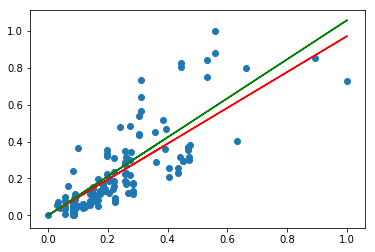

In [93]:
#plotting using the most significant and non categorical variable for better result - horsepower

plt.scatter(X_train_trial['horsepower'], y_train)
plt.plot(X_train_trial['horsepower'], X_train_trial['horsepower'] * 0.9710, 'r')
plt.plot(X_train_new['horsepower'], X_train_new['horsepower'] *  1.0572, 'g')

plt.show()

### 6. Residual analysis on error terms in training data

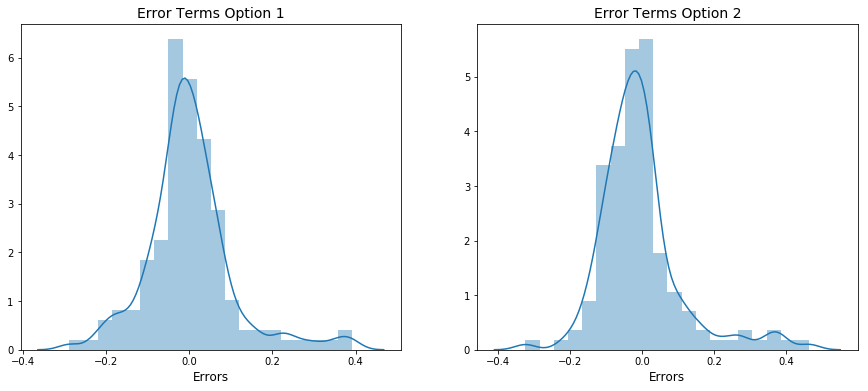

In [94]:
y_train_trial_price = lm_opt2.predict(X_train_trial)
y_train_new_price = lm_opt1.predict(X_train_new)

#Plot error term histogram
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.distplot((y_train - y_train_new_price), bins = 20)
plt.title('Error Terms Option 1', fontsize = 14) 
plt.xlabel('Errors', fontsize = 12)

plt.subplot(1,2,2)
sns.distplot((y_train - y_train_trial_price), bins = 20)
plt.title('Error Terms Option 2', fontsize = 14) 
plt.xlabel('Errors', fontsize = 12)

plt.show()

Given the above residual analysis and other statistics. Since the models are not very highly different using the simpler model of option 2 to make predictions. Finalizing option 2

### 7. Making predictions using the final model - Option 2

price = -0.1131 * stroke + 1.0572 * horsepower + 0.2384 * compressionratio

In [95]:
#quant_vars contains the numeric variables
df_test[quant_vars] = scaler.transform(df_test[quant_vars])

In [96]:
y_test = df_test.pop('price')
X_test = df_test

In [97]:
X_test_opt2 = X_test[['stroke', 'horsepower', 'compressionratio']]
y_pred_opt2 = lm_opt2.predict(X_test_opt2)

Text(0, 0.5, 'y_pred')

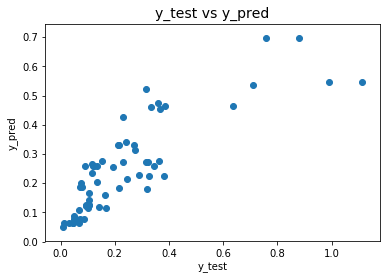

In [98]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_pred_opt2)
plt.title('y_test vs y_pred', fontsize = 14)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_opt2)
r_squared = r2_score(y_test, y_pred_opt2)

In [100]:
print(mse)
print(r_squared)

0.017115872377187136
0.6797673035757074


R2 is lower 68% in our test data vs approx 86% in training data. Which isn't ideal but is not too drastic either. Therefore we can wrap up our analysis and use the model